시작

In [102]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns #시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime

import os
print(os.listdir("./input"))

['sampleSubmission.csv', 'test.csv', 'train.csv']


In [103]:
#훈련데이터와 테스트 데이터 세트를 불러온다
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [104]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
# datetime을 년,월,일,시 값으로 나누어서 확인
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['dayofweek'] = train.datetime.dt.dayofweek

test['year'] = test.datetime.dt.year
test['month'] =test.datetime.dt.month
test['day'] = test.datetime.dt.day
test['hour'] = test.datetime.dt.hour
test['dayofweek'] = test.datetime.dt.dayofweek

In [105]:
# 필요 없는 특성 제거
train.columns, test.columns
del_train=['datetime','casual','registered']
train.drop(del_train, axis=1,inplace=True)
test.drop('datetime', axis=1,inplace=True)

모델 평가

In [106]:
# y is predict value y_ is actual value
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y), 
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [107]:
from sklearn.model_selection import train_test_split
target = train['count']
features = train.drop(columns=['count'])
train_input, test_input, train_target, test_target = train_test_split(
    features,target, random_state=42
)

train_target_log = np.log1p(train_target)
test_target_log = np.log1p(test_target)

선형회귀

In [108]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr = LinearRegression()

lr.fit(train_input,train_target_log)
print(lr.score(train_input,train_target_log))
print(lr.score(test_input,test_target_log))
# 성능평가
pred = lr.predict(test_input)
print('RMSLE Value for LinearRegression {}'.format(rmsle(np.exp(test_target_log),np.exp(pred),False)))

0.4902071585781206
0.4802692188648171
RMSLE Value for LinearRegression 0.9824342918788872


In [109]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

gb.fit(train_input,train_target_log)
print(gb.score(train_input,train_target_log))
print(gb.score(test_input,test_target_log))
preds = gb.predict(train_input)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(train_target_log),np.exp(preds),False)))

0.9319127618890259
0.9284026911177744
RMSLE Value for GradientBoosting 0.3528189308612493


In [110]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(train_input,train_target_log)
print(rf.score(train_input,train_target_log))
print(rf.score(test_input,test_target_log))
preds = rf.predict(test_input)
print('RMSLE Value for RandomForest {}'.format(rmsle(np.exp(test_target_log),np.exp(preds),False)))

0.993449928036073
0.9570495552564797
RMSLE Value for RandomForest 0.2760534289933543


In [111]:
# RandomForestRegressor
preds_rf = rf.predict(test)
# 다시 지수로 바꾸기
test_target_exp = np.exp(test_target_log)
preds_rf_exp = np.exp(preds_rf)
# evaluate_regr(test_target_exp,pred_exp)

preds_rf_exp

array([ 14.58316047,   6.48846598,   5.14343672, ..., 127.05020635,
       103.15267476,  62.71757865])

<AxesSubplot:ylabel='Density'>

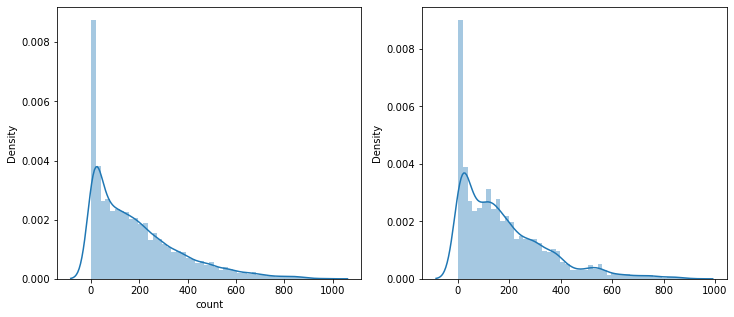

In [112]:
predsTest = rf.predict(test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(target,ax=ax1,bins=50)
sns.distplot(preds_rf_exp,ax=ax2,bins=50)

In [113]:
submit = pd.read_csv("./input/sampleSubmission.csv")
submit['count'] = preds_rf_exp
submit.to_csv("./results_rf_1.2.csv",index=False)

1.0v 다른점

상관관계가 작은 데이터는 다 지워 버린다.

0.71439 나왔다. 특성을 함부로 지우면 안되겠다.